In [1]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

In [2]:
news_df = pd.read_csv("tweets/bloomberg_financial_news_sentiments_with_scores.csv")
news_df.head()

,date,tweet,time,neg,neu,pos,compound
0,2021-02-03,new figures show that more than hong kongers r...,15:54:03,0.000,0.947,0.053,0.0772
1,2021-02-03,indegene a bangalore based global healthcare s...,15:51:06,0.000,0.914,0.086,0.1779
2,2021-02-03,new ether cryptocurrency futures could put at ...,15:48:03,0.160,0.840,0.000,-0.2732
3,2021-02-03,the u s has filed court documents in a bid to ...,15:48:03,0.433,0.567,0.000,-0.9694
4,2021-02-03,boeing is biggest x customer is weighing wheth...,15:47:03,0.000,1.000,0.000,0.0000


In [3]:
score = news_df['compound'].values
labels = []

for i in score:
    if i >= 0.3:
        labels.append('pos')
    elif i <= -0.3:
        labels.append('neg')
    else:
        labels.append('neu')

In [4]:
news_df['labels'] = labels
news_df.head()

,date,tweet,time,neg,neu,pos,compound,labels
0,2021-02-03,new figures show that more than hong kongers r...,15:54:03,0.000,0.947,0.053,0.0772,neu
1,2021-02-03,indegene a bangalore based global healthcare s...,15:51:06,0.000,0.914,0.086,0.1779,neu
2,2021-02-03,new ether cryptocurrency futures could put at ...,15:48:03,0.160,0.840,0.000,-0.2732,neu
3,2021-02-03,the u s has filed court documents in a bid to ...,15:48:03,0.433,0.567,0.000,-0.9694,neg
4,2021-02-03,boeing is biggest x customer is weighing wheth...,15:47:03,0.000,1.000,0.000,0.0000,neu


In [5]:
news_df2 = pd.read_csv("tweets/yahoo_financial_news_sentiments_with_scores.csv")
news_df2.head()

,date,tweet,time,neg,neu,pos,compound
0,2021-02-03,alibaba plans up to billion u s dollar bond is...,10:36:03,0.000,1.000,0.000,0.0000
1,2021-02-03,treasury is yellen to call regulator meeting o...,09:59:33,0.000,0.847,0.153,0.2023
2,2021-02-03,amazon ceo jeff bezos is stepping down amazon ...,07:19:16,0.000,0.779,0.221,0.3400
3,2021-02-03,amazon history how jeff bezos started with mai...,06:41:11,0.000,0.898,0.102,0.1779
4,2021-02-03,jeff bezos email to employees keep inventing a...,06:19:16,0.107,0.805,0.088,-0.1124


In [6]:
score = news_df2['compound'].values
labels = []

for i in score:
    if i >= 0.3:
        labels.append('pos')
    elif i <= -0.3:
        labels.append('neg')
    else:
        labels.append('neu')

In [7]:
news_df2['labels'] = labels
news_df2.head()

,date,tweet,time,neg,neu,pos,compound,labels
0,2021-02-03,alibaba plans up to billion u s dollar bond is...,10:36:03,0.000,1.000,0.000,0.0000,neu
1,2021-02-03,treasury is yellen to call regulator meeting o...,09:59:33,0.000,0.847,0.153,0.2023,neu
2,2021-02-03,amazon ceo jeff bezos is stepping down amazon ...,07:19:16,0.000,0.779,0.221,0.3400,pos
3,2021-02-03,amazon history how jeff bezos started with mai...,06:41:11,0.000,0.898,0.102,0.1779,neu
4,2021-02-03,jeff bezos email to employees keep inventing a...,06:19:16,0.107,0.805,0.088,-0.1124,neu


In [8]:
news_df = pd.concat([news_df,news_df2])
news_df.head(20)

,date,tweet,time,neg,neu,pos,compound,labels
0,2021-02-03,new figures show that more than hong kongers r...,15:54:03,0.000,0.947,0.053,0.0772,neu
1,2021-02-03,indegene a bangalore based global healthcare s...,15:51:06,0.000,0.914,0.086,0.1779,neu
2,2021-02-03,new ether cryptocurrency futures could put at ...,15:48:03,0.160,0.840,0.000,-0.2732,neu
3,2021-02-03,the u s has filed court documents in a bid to ...,15:48:03,0.433,0.567,0.000,-0.9694,neg
4,2021-02-03,boeing is biggest x customer is weighing wheth...,15:47:03,0.000,1.000,0.000,0.0000,neu
5,2021-02-03,spain is largest bank takes a billion charge i...,15:47:02,0.115,0.885,0.000,-0.2960,neu
6,2021-02-03,britons are guzzling the australian wine that ...,15:42:02,0.000,1.000,0.000,0.0000,neu
7,2021-02-03,foster farms is providing of its poultry worke...,15:38:04,0.000,1.000,0.000,0.0000,neu
8,2021-02-03,hungarian low cost airline wizz air wants to p...,15:37:04,0.268,0.732,0.000,-0.5927,neg
9,2021-02-03,porsche is increasing spending to bolster the ...,15:35:01,0.000,1.000,0.000,0.0000,neu


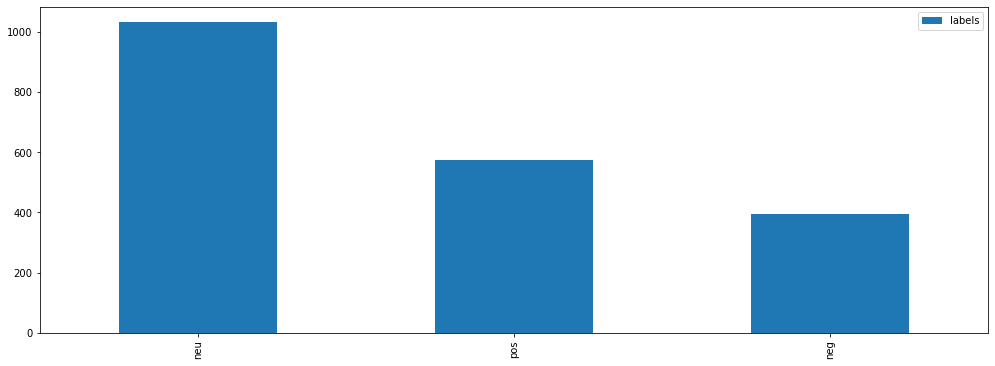

In [10]:
from matplotlib import pyplot as plt

x = pd.DataFrame(news_df['labels'].value_counts())
x.astype('int64').dtypes
ax = x.plot.bar(figsize=(17,6),y='labels', rot=90)

In [13]:
colnames=['labels','sentence'] 
df = pd.read_csv('financial phrase bank.csv', encoding='latin-1',names=colnames )
df.head()

,labels,sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


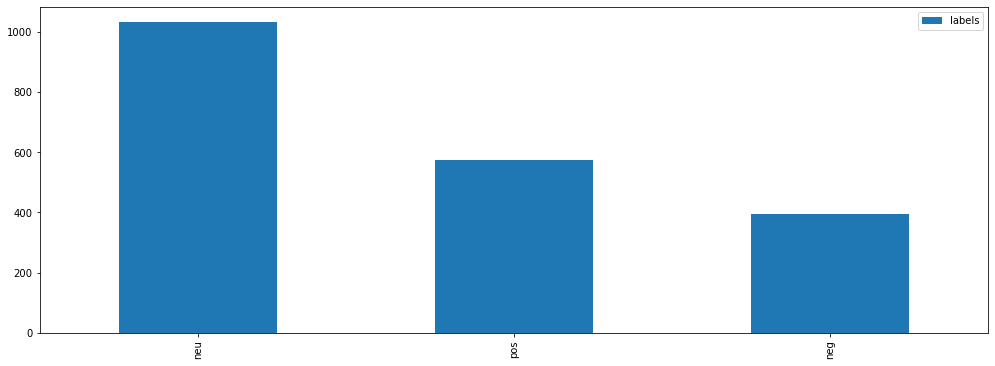

In [14]:
x = pd.DataFrame(news_df['labels'].value_counts())
x.astype('int64').dtypes
ax = x.plot.bar(figsize=(17,6),y='labels', rot=90)